In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

In [2]:
Iris = load_iris()

In [4]:
Iris_Data = pd.DataFrame(data=np.c_[Iris['data'],Iris['target']],columns=Iris['feature_names']+['target'])

In [6]:
Iris_Data['target'] = Iris_Data['target'].map({0:'setosa',1:'versicolor',2:'virginica'})
Iris_Data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
print('품종종류:', Iris_Data['target'].unique(), sep='\n')

품종종류:
['setosa' 'versicolor' 'virginica']


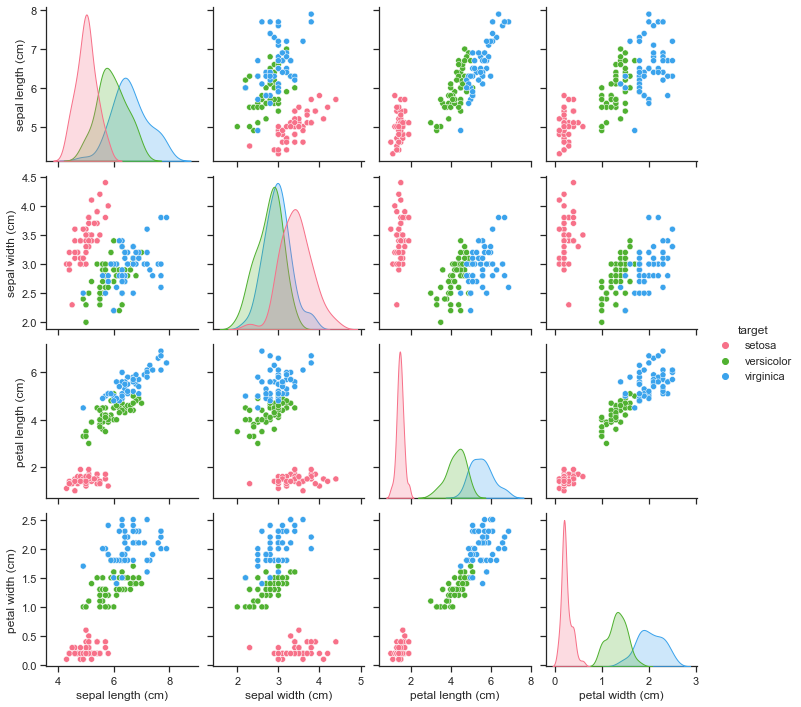

In [15]:
import seaborn as sns
sns.set(style="ticks",color_codes=True)
g = sns.pairplot(Iris_Data,hue='target',palette='husl')

In [19]:
Iris_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\zoey.j.han\Anaconda3\envs\study_nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='sepal width (cm)'>

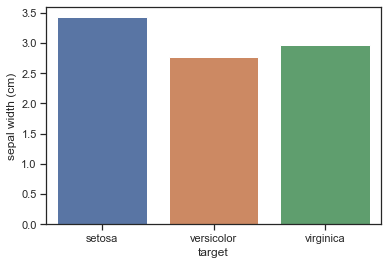

In [23]:
sns.barplot(Iris_Data['target'],Iris_Data['sepal width (cm)'], ci=None)

<AxesSubplot:>

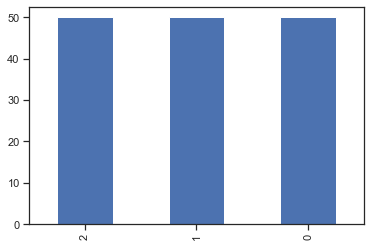

In [24]:
Iris_Data['target'] = Iris_Data['target'].replace(['setosa','versicolor','virginica'],[0,1,2])
Iris_Data['target'].value_counts().plot(kind='bar')

In [25]:
Iris_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [28]:
from sklearn.model_selection import train_test_split
data_X = Iris_Data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
data_y = Iris_Data['target'].values

In [31]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=10)

In [32]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=200,batch_size=1,validation_data=(X_test,y_test)) # default batch_size = 32

Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 2.9298 - accuracy: 0.3083 - val_loss: 1.8015 - val_accuracy: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 457us/step - loss: 2.0444 - accuracy: 0.3667 - val_loss: 1.2782 - val_accuracy: 0.7000
Epoch 3/200
120/120 [==============================] - 0s 451us/step - loss: 1.2942 - accuracy: 0.6250 - val_loss: 0.8680 - val_accuracy: 0.7667
Epoch 4/200
120/120 [==============================] - 0s 473us/step - loss: 0.8199 - accuracy: 0.7500 - val_loss: 0.7265 - val_accuracy: 1.0000
Epoch 5/200
120/120 [==============================] - 0s 449us/step - loss: 0.6686 - accuracy: 0.9333 - val_loss: 0.7090 - val_accuracy: 0.8000
Epoch 6/200
120/120 [==============================] - 0s 409us/step - loss: 0.6279 - accuracy: 0.9000 - val_loss: 0.7023 - val_accuracy: 0.7000
Epoch 7/200
120/120 [==============================] - 0s 506us/step - loss: 0.6062 - accuracy: 0.8667 - val_loss: 0.6880 - val_accu

120/120 [==============================] - 0s 414us/step - loss: 0.3074 - accuracy: 0.9667 - val_loss: 0.3532 - val_accuracy: 0.9333
Epoch 58/200
120/120 [==============================] - 0s 495us/step - loss: 0.3046 - accuracy: 0.9583 - val_loss: 0.3604 - val_accuracy: 0.8333
Epoch 59/200
120/120 [==============================] - 0s 445us/step - loss: 0.3024 - accuracy: 0.9333 - val_loss: 0.3489 - val_accuracy: 0.9333
Epoch 60/200
120/120 [==============================] - 0s 440us/step - loss: 0.3021 - accuracy: 0.9583 - val_loss: 0.3386 - val_accuracy: 0.9333
Epoch 61/200
120/120 [==============================] - 0s 440us/step - loss: 0.2985 - accuracy: 0.9667 - val_loss: 0.3452 - val_accuracy: 0.9333
Epoch 62/200
120/120 [==============================] - 0s 452us/step - loss: 0.2955 - accuracy: 0.9583 - val_loss: 0.3414 - val_accuracy: 0.9333
Epoch 63/200
120/120 [==============================] - 0s 438us/step - loss: 0.2945 - accuracy: 0.9667 - val_loss: 0.3373 - val_accuracy

120/120 [==============================] - 0s 441us/step - loss: 0.2157 - accuracy: 0.9667 - val_loss: 0.2442 - val_accuracy: 1.0000
Epoch 114/200
120/120 [==============================] - 0s 448us/step - loss: 0.2160 - accuracy: 0.9583 - val_loss: 0.2525 - val_accuracy: 0.9333
Epoch 115/200
120/120 [==============================] - 0s 443us/step - loss: 0.2150 - accuracy: 0.9750 - val_loss: 0.2454 - val_accuracy: 0.9667
Epoch 116/200
120/120 [==============================] - 0s 449us/step - loss: 0.2151 - accuracy: 0.9583 - val_loss: 0.2521 - val_accuracy: 0.9333
Epoch 117/200
120/120 [==============================] - 0s 442us/step - loss: 0.2122 - accuracy: 0.9667 - val_loss: 0.2451 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 342us/step - loss: 0.2127 - accuracy: 0.9750 - val_loss: 0.2500 - val_accuracy: 0.9333
Epoch 119/200
120/120 [==============================] - 0s 384us/step - loss: 0.2097 - accuracy: 0.9667 - val_loss: 0.2481 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 439us/step - loss: 0.1705 - accuracy: 0.9667 - val_loss: 0.1986 - val_accuracy: 0.9667
Epoch 170/200
120/120 [==============================] - 0s 443us/step - loss: 0.1713 - accuracy: 0.9583 - val_loss: 0.2046 - val_accuracy: 0.9667
Epoch 171/200
120/120 [==============================] - 0s 448us/step - loss: 0.1686 - accuracy: 0.9750 - val_loss: 0.2008 - val_accuracy: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 443us/step - loss: 0.1692 - accuracy: 0.9667 - val_loss: 0.2002 - val_accuracy: 0.9667
Epoch 173/200
120/120 [==============================] - 0s 443us/step - loss: 0.1682 - accuracy: 0.9667 - val_loss: 0.1955 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 415us/step - loss: 0.1675 - accuracy: 0.9750 - val_loss: 0.1941 - val_accuracy: 0.9667
Epoch 175/200
120/120 [==============================] - 0s 439us/step - loss: 0.1674 - accuracy: 0.9750 - val_loss: 0

In [43]:
import matplotlib.pyplot as plt

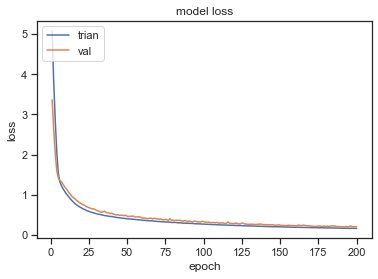

In [46]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['trian','val'],loc='upper left')
plt.show()

In [54]:
model.evaluate(X_test,y_test)[1]

1/1 [==============================] - 0s 0s/step - loss: 0.1821 - accuracy: 0.9667


0.9666666388511658